<a href="https://colab.research.google.com/github/RaoSharjeelKhan/Machine-Learning/blob/main/Multi_Output_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [38]:
df=pd.read_excel("/content/ENB2012_data.xlsx")
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Data Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [29]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Preprocessing

In [42]:
def data_division(data):
  X=data.iloc[:,:8]
  Y1=data['Y1']
  Y2=data['Y2']
  Y=data.iloc[:,8:10]
  return X,Y1,Y2,Y

In [48]:
def norm(data):
  scaler=MinMaxScaler()
  df_norm=pd.DataFrame(data=scaler.fit_transform(data),columns=data.columns)
  return df_norm

In [49]:
def data_split(x,y):
  X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [97]:
df=norm(df)
X,Y1,Y2,Y=data_division(df)
X_train, X_test, y_train, y_test =data_split(X,Y)

## Model Training

In [98]:
input_layer=Input(shape=(8,))
L1=Dense(units=128, activation='relu')(input_layer)
L2=Dense(units=128, activation='relu')(L1)
output_1=Dense(units=1,name='output_1')(L2)
L3=Dense(units=64, activation='relu')(L2)
output_2=Dense(units=1,name='output_2')(L3)
model=Model(inputs=input_layer, outputs=[output_1, output_2])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={'output_1':'mse','output_2':'mse'},
    metrics={'output_1':tf.keras.metrics.RootMeanSquaredError(),
             'output_2':tf.keras.metrics.RootMeanSquaredError()})
print(model.summary())

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_72 (Dense)               (None, 128)          1152        ['input_17[0][0]']               
                                                                                                  
 dense_73 (Dense)               (None, 128)          16512       ['dense_72[0][0]']               
                                                                                                  
 dense_74 (Dense)               (None, 64)           8256        ['dense_73[0][0]']               
                                                                                           

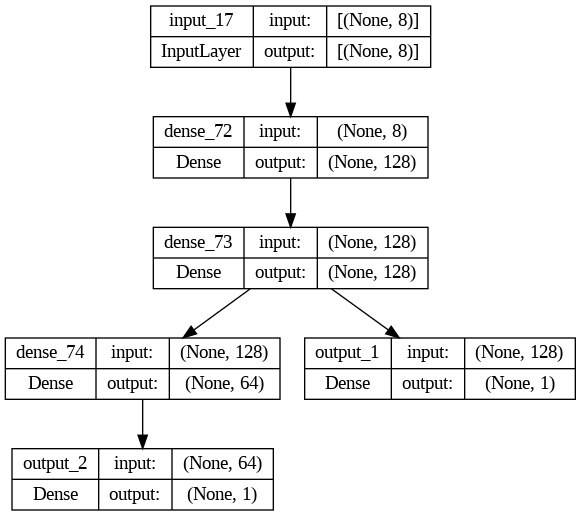

In [99]:
plot_model(model, show_shapes=True)

In [100]:
history=model.fit(X_train,y_train,epochs=400,batch_size=12,validation_split=0.1)

Epoch 1/400
46/46 [==============================] - 2s 8ms/step - loss: 0.0690 - output_1_loss: 0.0195 - output_2_loss: 0.0495 - output_1_root_mean_squared_error: 0.1397 - output_2_root_mean_squared_error: 0.2226 - val_loss: 0.0119 - val_output_1_loss: 0.0054 - val_output_2_loss: 0.0064 - val_output_1_root_mean_squared_error: 0.0738 - val_output_2_root_mean_squared_error: 0.0803
Epoch 2/400
46/46 [==============================] - 0s 4ms/step - loss: 0.0174 - output_1_loss: 0.0085 - output_2_loss: 0.0088 - output_1_root_mean_squared_error: 0.0922 - output_2_root_mean_squared_error: 0.0941 - val_loss: 0.0113 - val_output_1_loss: 0.0057 - val_output_2_loss: 0.0056 - val_output_1_root_mean_squared_error: 0.0754 - val_output_2_root_mean_squared_error: 0.0748
Epoch 3/400
46/46 [==============================] - 0s 3ms/step - loss: 0.0162 - output_1_loss: 0.0081 - output_2_loss: 0.0081 - output_1_root_mean_squared_error: 0.0899 - output_2_root_mean_squared_error: 0.0902 - val_loss: 0.0091 -